Train cost: 2.7303606875
Train accuracy: 36665.0769838137%
Train data: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Train Neuron A: [[0.00654946 0.00599505 0.00627255 ... 0.006072   0.00623669 0.00572482]
 [0.00654946 0.00599505 0.00627255 ... 0.006072   0.00623669 0.00572482]
 [0.00654946 0.00599505 0.00627255 ... 0.006072   0.00623669 0.00572482]
 ...
 [0.00654946 0.00599505 0.00627255 ... 0.006072   0.00623669 0.00572482]
 [0.00654946 0.00599505 0.00627255 ... 0.006072   0.00623669 0.00572482]
 [0.00654946 0.00599505 0.00627255 ... 0.006072   0.00623669 0.00572482]]
Dev cost: 2.7520213697
Dev accuracy: 36327.1867612293%
Dev data: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Dev Neuron A: [[0.00583402 0.0070557  0.00597876 ... 0.00606849 0.00709978 0.00581196]
 [0.00583402 0.0070557  0.00597876 ... 0.00606849 0.00709978 0.00581196]
 [0.

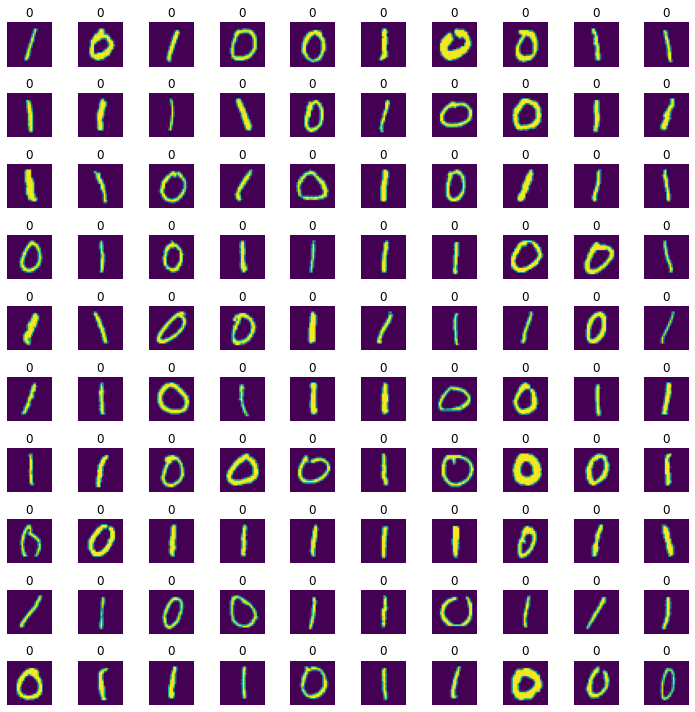

In [4]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np

Neuron = __import__('6-neuron').Neuron

lib_train = np.load('../data/Binary_Train.npz')
X_train_3D, Y_train = lib_train['X'], lib_train['Y']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1)).T
lib_dev = np.load('../data/Binary_Dev.npz')
X_dev_3D, Y_dev = lib_dev['X'], lib_dev['Y']
X_dev = X_dev_3D.reshape((X_dev_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X_train.shape[0])
A, cost = neuron.train(X_train, Y_train, iterations=10)
accuracy = np.sum(A == Y_train) / Y_train.shape[1] * 100
print("Train cost:", np.round(cost, decimals=10))
print("Train accuracy: {}%".format(np.round(accuracy, decimals=10)))
print("Train data:", np.round(A, decimals=10))
print("Train Neuron A:", np.round(neuron.A, decimals=10))

A, cost = neuron.evaluate(X_dev, Y_dev)
accuracy = np.sum(A == Y_dev) / Y_dev.shape[1] * 100
print("Dev cost:", np.round(cost, decimals=10))
print("Dev accuracy: {}%".format(np.round(accuracy, decimals=10)))
print("Dev data:", np.round(A, decimals=10))
print("Dev Neuron A:", np.round(neuron.A, decimals=10))

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_dev_3D[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()